# My Week 3 Assignment 

In [2]:
# You may need this setup
using Plots
gr() # Activate the GR backend for use with Plots

Plots.GRBackend()

In [4]:
#reading data into array
using DelimitedFiles
data_tofit = DelimitedFiles.readdlm("Week3_PR_Data.dat")

15×2 Array{Float64,2}:
 0.1268     -1.6417  
 0.501309   -0.977698
 1.52801     0.527711
 1.70012     1.71152 
 1.99249     1.891   
 2.70608    -0.463428
 2.99493    -0.443567
 3.49185    -1.27518 
 3.50119    -0.6905  
 4.45992    -5.51613 
 4.93697    -6.0017  
 5.02329    -8.36417 
 5.04234    -7.92448 
 5.50739   -10.7748  
 5.56867   -10.9172  

Import the supplied data representing 15 pairs to x- and y-values. 

In [5]:
data_tofit = [1.6800483    -1.641695388; 
              0.501309281  -0.977697538; 
              1.528012113   0.52771122;
              1.70012253    1.711524991; 
              1.992493625   1.891000015;
              2.706075824  -0.463427794;
              2.994931927  -0.443566619;
              3.491852811  -1.275179133;
              3.501191722  -0.690499597;
              4.459924502  -5.516130799;
              4.936965851  -6.001703074;
              5.023289852  -8.36416901;
              5.04233698   -7.924477517;
              5.50739285  -10.77482371;
              5.568665171 -10.9171878]

# Create the arrays x and y, assigning x the first column of data_tofit and y the second column


15×2 Array{Float64,2}:
 1.68005    -1.6417  
 0.501309   -0.977698
 1.52801     0.527711
 1.70012     1.71152 
 1.99249     1.891   
 2.70608    -0.463428
 2.99493    -0.443567
 3.49185    -1.27518 
 3.50119    -0.6905  
 4.45992    -5.51613 
 4.93697    -6.0017  
 5.02329    -8.36417 
 5.04234    -7.92448 
 5.50739   -10.7748  
 5.56867   -10.9172  

Then we do a scatterplot, this gives us the points the line must go through.

In [6]:
#manually loop through and prints values in data_tofit
for values in data_tofit
    println(values)
end

1.6800483
0.501309281
1.528012113
1.70012253
1.992493625
2.706075824
2.994931927
3.491852811
3.501191722
4.459924502
4.936965851
5.023289852
5.04233698
5.50739285
5.568665171
-1.641695388
-0.977697538
0.52771122
1.711524991
1.891000015
-0.463427794
-0.443566619
-1.275179133
-0.690499597
-5.516130799
-6.001703074
-8.36416901
-7.924477517
-10.77482371
-10.9171878


In [7]:
#manually loop through and prints values in data_tofit into 15x2 matrix
for rs in 1:(size(data_tofit)[1])
    for cs in 1:(size(data_tofit)[2])
        value = data_tofit[rs,cs]
        if cs == 1
            print("$value \t")
        else
            print("$value \n")
        end
    end
end

1.6800483 	-1.641695388 
0.501309281 	-0.977697538 
1.528012113 	0.52771122 
1.70012253 	1.711524991 
1.992493625 	1.891000015 
2.706075824 	-0.463427794 
2.994931927 	-0.443566619 
3.491852811 	-1.275179133 
3.501191722 	-0.690499597 
4.459924502 	-5.516130799 
4.936965851 	-6.001703074 
5.023289852 	-8.36416901 
5.04233698 	-7.924477517 
5.50739285 	-10.77482371 
5.568665171 	-10.9171878 


In [8]:
# create the arrays x and y, assigning x the first column and y the second column
x = data_tofit[:,1]
y = data_tofit[:,2]

# print values
println("x values: $x \n")
println("y values: $y")

x values: [1.68005, 0.501309, 1.52801, 1.70012, 1.99249, 2.70608, 2.99493, 3.49185, 3.50119, 4.45992, 4.93697, 5.02329, 5.04234, 5.50739, 5.56867] 

y values: [-1.6417, -0.977698, 0.527711, 1.71152, 1.891, -0.463428, -0.443567, -1.27518, -0.6905, -5.51613, -6.0017, -8.36417, -7.92448, -10.7748, -10.9172]


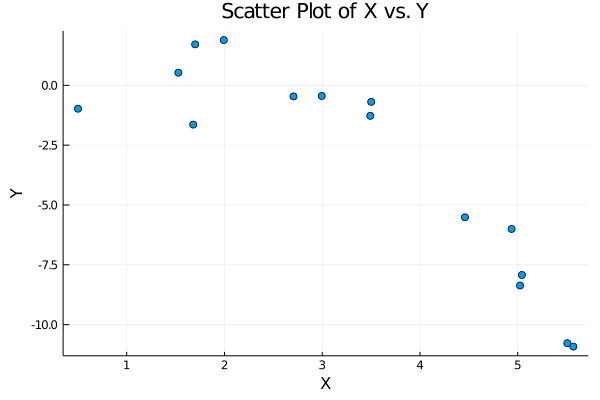

In [9]:
# Plot the x and y data points using a scatter plot of the x and y array variables
plot(x, y, 
    title = "Scatter Plot of X vs. Y", 
    xlabel = "X",
    ylabel = "Y",
    linetype = :scatter, 
    legend = false)

For the line, we need a function, which we now define. Note that the parameters a, b, c need not be passed to the function: we will keep resetting them to try to improve the fit.

In [10]:
# Create a function called parabfit, with x as the argument, returning a*x^2 + b*x + c
function parabfit(x)
    return a*x^2 + b*x + c
end

parabfit (generic function with 1 method)

Let's check that we do get a reasonable parabola. Choose your own interval [xmin, xmax] and parameters a, b, c. If it looks too much like a straight line, chance your choices until it does.

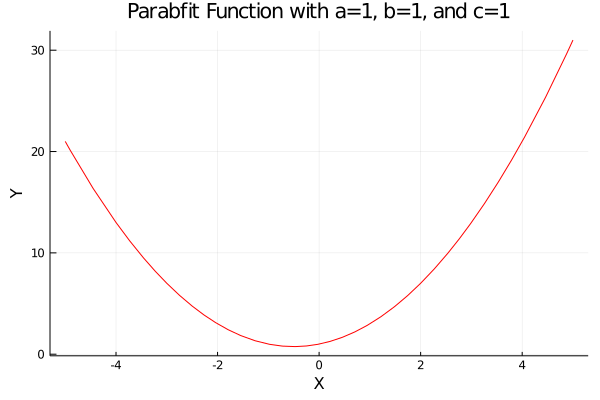

In [11]:
# Create variables a, b and c, assigning each the value 1
a = 1
b = 1
c = 1

# Plot the function parabfit, for x values between -5 and 5 
plot(parabfit, -5, 5,
    title = "Parabfit Function with a=1, b=1, and c=1", 
    xlabel = "X",
    ylabel = "Y",
    line = (:path, :red),
    legend = false)

Now we choose a, b, c and plot the curve together with the points. 

Note that by looking at where the data points lie, we can deduce some of the properties for a, b, c, as follows.

The plot must have a y-intersection that is close to 0, so c is close to 0. Also, the parabola is open downwards, so a must be negative. Finally, it has its maximum at a positive x, so b must be positive. 

Use plot() to start with the scatter plot and plot!() to add the curve for parabfit. (There are other ways to do this ...)

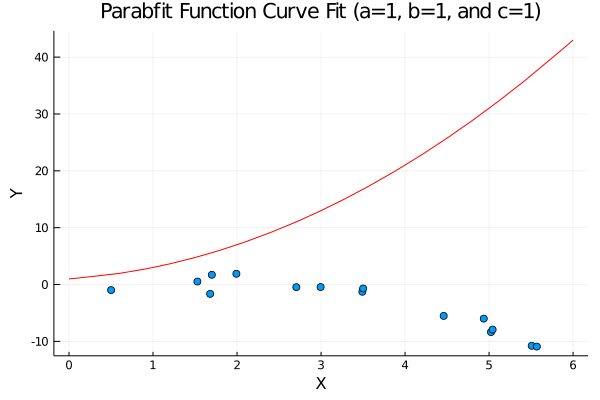

In [12]:
# More plot!() tries.
# a,b,c = 
a = 1; b = 1; c = 1;

# scatter plot data
plot(x, y, linetype = :scatter, legend = false)

# overlay parabolic curve fit
plot!(parabfit, 0, 6,
    title = "Parabfit Function Curve Fit (a=$a, b=$b, and c=$c)", 
    xlabel = "X",
    ylabel = "Y",
    line = (:path, :red),
    legend = false)

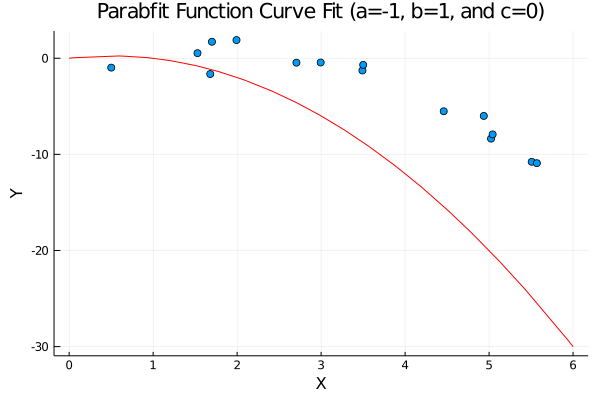

In [13]:
# modify variables a, b and c
a = -1; b = 1; c = 0;

# scatter plot data
plot(x, y, linetype = :scatter, legend = false)

# overlay parabolic curve fit
plot!(parabfit, 0, 6,
    title = "Parabfit Function Curve Fit (a=$a, b=$b, and c=$c)", 
    xlabel = "X",
    ylabel = "Y",
    line = (:path, :red),
    legend = false)

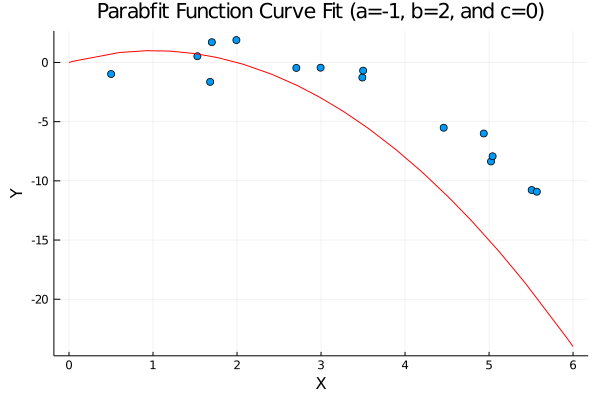

In [14]:
# modify variables a, b and c
a = -1; b = 2; c = 0;

# scatter plot data
plot(x, y, linetype = :scatter, legend = false)

# overlay parabolic curve fit
plot!(parabfit, 0, 6,
    title = "Parabfit Function Curve Fit (a=$a, b=$b, and c=$c)", 
    xlabel = "X",
    ylabel = "Y",
    line = (:path, :red),
    legend = false)

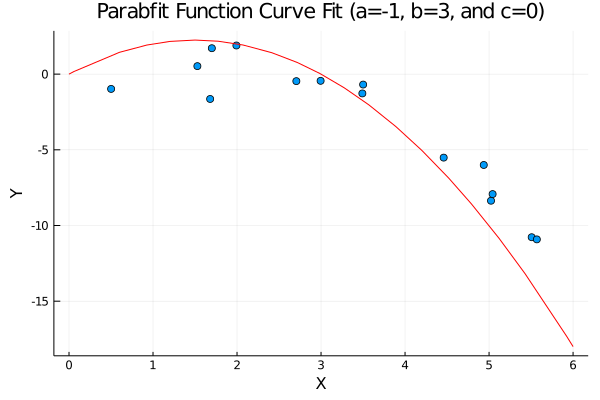

In [15]:
# modify variables a, b and c
a = -1; b = 3; c = 0;

# scatter plot data
plot(x, y, linetype = :scatter, legend = false)

# overlay parabolic curve fit
plot!(parabfit, 0, 6,
    title = "Parabfit Function Curve Fit (a=$a, b=$b, and c=$c)", 
    xlabel = "X",
    ylabel = "Y",
    line = (:path, :red),
    legend = false)

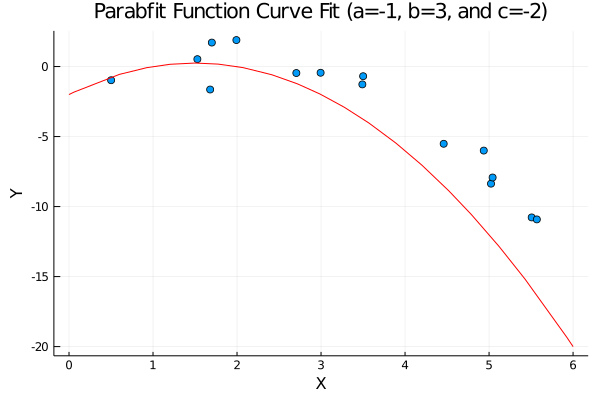

In [16]:
# modify variables a, b and c
a = -1; b = 3; c = -2;

# scatter plot data
plot(x, y, linetype = :scatter, legend = false)

# overlay parabolic curve fit
plot!(parabfit, 0, 6,
    title = "Parabfit Function Curve Fit (a=$a, b=$b, and c=$c)", 
    xlabel = "X",
    ylabel = "Y",
    line = (:path, :red),
    legend = false)

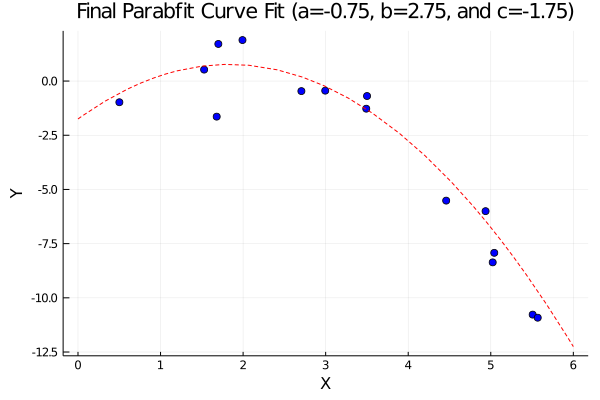

In [17]:
a = -.75; b = 2.75; c = -1.75;

# scatter plot data
plot(x, y, linetype = :scatter, color="blue", legend = false)

# overlay parabolic curve fit
plot!(parabfit, 0, 6,
title = "Final Parabfit Curve Fit (a=$a, b=$b, and c=$c)", 
    xlabel = "X",
    ylabel = "Y",
    line = (:path, :red, :dash),
    legend = false)


Fit Methodolgy used from (1,1,1) to (-0.75, -2.75, -1.75)